In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline

In [33]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is A0E8-ECE8

 Directory of C:\Users\saims\OneDrive\Desktop\CSE476-Machine-Learning-Lab

20-Jun-23  12:19 AM    <DIR>          .
20-Jun-23  12:19 AM    <DIR>          ..
20-Jun-23  12:19 AM    <DIR>          .ipynb_checkpoints
19-Jun-23  11:09 AM            10,342 _cmaprf1rocroccurve.ipynb
19-Jun-23  11:04 AM            23,957 _senti.ipynb
14-Jun-23  12:52 PM            15,464 00_LabelEncoder, OrdianlEncoder, OneHotEncoder.ipynb
14-Jun-23  06:24 AM            51,679 01_Logistic Regression.ipynb
14-Jun-23  01:04 AM            69,780 02_Support Vector Machine.ipynb
14-Jun-23  01:20 AM            91,769 03_Decision Tree.ipynb
14-Jun-23  06:35 AM           244,277 04_Random Forest.ipynb
14-Jun-23  07:26 PM            60,482 05_K Nearest Neighbour.ipynb
20-Jun-23  12:19 AM            76,937 06_Confusion Matrix, Accuracy, Recall, Precision, F1, FPR, TPR, ROC.ipynb
19-Jun-23  10:41 AM           103,948 07_Sentiment Analysis (IMDB Dataset)

In [34]:
# read the csv file

df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [36]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [37]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [38]:
X = df.drop(['HeartDisease'], axis=1)
y = df.HeartDisease

In [39]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [40]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [41]:
encoder = OrdinalEncoder()

In [42]:
X[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [43]:
X[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']] = encoder.fit_transform(X[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

In [44]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0


In [45]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train, X_test

(array([[0.60416667, 1.        , 0.33333333, ..., 0.        , 0.38636364,
         0.5       ],
        [0.22916667, 0.        , 0.66666667, ..., 0.        , 0.29545455,
         0.5       ],
        [0.625     , 1.        , 0.        , ..., 0.        , 0.29545455,
         1.        ],
        ...,
        [0.1875    , 1.        , 0.66666667, ..., 0.        , 0.69318182,
         0.        ],
        [0.64583333, 1.        , 0.33333333, ..., 1.        , 0.29545455,
         1.        ],
        [0.54166667, 1.        , 0.        , ..., 1.        , 0.61363636,
         0.5       ]]),
 array([[0.41666667, 1.        , 0.33333333, ..., 0.        , 0.29545455,
         1.        ],
        [0.77083333, 1.        , 0.        , ..., 1.        , 0.46590909,
         0.5       ],
        [0.54166667, 1.        , 0.        , ..., 1.        , 0.63636364,
         0.5       ],
        ...,
        [0.625     , 0.        , 0.66666667, ..., 0.        , 0.29545455,
         1.        ],
        [0.4

In [50]:
model = SVC(kernel='linear')

In [51]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
y_pred = model.predict(X_test)

In [53]:
model.score(X_test, y_test)

0.8152173913043478

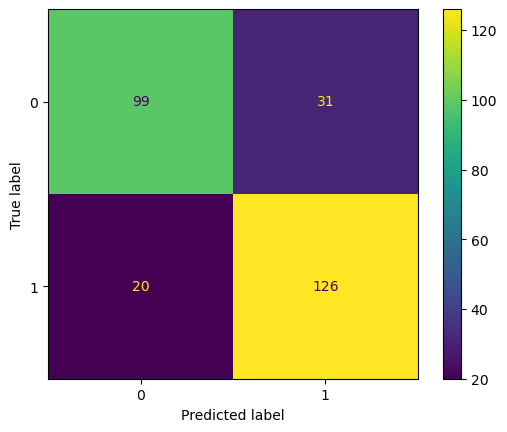

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [103]:
accuracy_score(y_test, y_pred)

0.8152173913043478

In [104]:
recall_score(y_test, y_pred)

0.863013698630137

In [105]:
precision_score(y_test, y_pred)

0.802547770700637

In [106]:
f1_score(y_test, y_pred)

0.8316831683168318

In [107]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       130
           1       0.80      0.86      0.83       146

    accuracy                           0.82       276
   macro avg       0.82      0.81      0.81       276
weighted avg       0.82      0.82      0.81       276



In [108]:
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

In [109]:
fpr

array([0.        , 0.        , 0.00769231, 0.00769231, 0.01538462,
       0.01538462, 0.02307692, 0.02307692, 0.03076923, 0.03076923,
       0.03846154, 0.03846154, 0.04615385, 0.04615385, 0.05384615,
       0.05384615, 0.06153846, 0.06153846, 0.06923077, 0.06923077,
       0.07692308, 0.07692308, 0.08461538, 0.08461538, 0.09230769,
       0.09230769, 0.1       , 0.1       , 0.10769231, 0.10769231,
       0.12307692, 0.12307692, 0.14615385, 0.14615385, 0.15384615,
       0.15384615, 0.16153846, 0.16153846, 0.16923077, 0.16923077,
       0.19230769, 0.19230769, 0.2       , 0.2       , 0.20769231,
       0.20769231, 0.21538462, 0.21538462, 0.23846154, 0.23846154,
       0.27692308, 0.27692308, 0.29230769, 0.29230769, 0.31538462,
       0.31538462, 0.33076923, 0.33076923, 0.41538462, 0.41538462,
       0.42307692, 0.42307692, 0.43076923, 0.43076923, 0.44615385,
       0.44615385, 0.5       , 0.5       , 0.52307692, 0.52307692,
       0.53846154, 0.53846154, 0.58461538, 0.58461538, 0.84615

In [110]:
tpr

array([0.        , 0.00684932, 0.00684932, 0.05479452, 0.05479452,
       0.08219178, 0.08219178, 0.2739726 , 0.2739726 , 0.28082192,
       0.28082192, 0.33561644, 0.33561644, 0.42465753, 0.42465753,
       0.46575342, 0.46575342, 0.47260274, 0.47260274, 0.49315068,
       0.49315068, 0.50684932, 0.50684932, 0.56849315, 0.56849315,
       0.61643836, 0.61643836, 0.65753425, 0.65753425, 0.69863014,
       0.69863014, 0.70547945, 0.70547945, 0.74657534, 0.74657534,
       0.76712329, 0.76712329, 0.78767123, 0.78767123, 0.80821918,
       0.80821918, 0.81506849, 0.81506849, 0.82191781, 0.82191781,
       0.83561644, 0.83561644, 0.85616438, 0.85616438, 0.86986301,
       0.86986301, 0.89726027, 0.89726027, 0.90410959, 0.90410959,
       0.9109589 , 0.9109589 , 0.91780822, 0.91780822, 0.93150685,
       0.93150685, 0.93835616, 0.93835616, 0.94520548, 0.94520548,
       0.95205479, 0.95205479, 0.96575342, 0.96575342, 0.97260274,
       0.97260274, 0.97945205, 0.97945205, 0.98630137, 0.98630

In [111]:
thresholds

array([ 5.66957699,  4.66957699,  4.19845809,  3.62048173,  3.58631462,
        3.19038451,  2.95046567,  2.07875143,  2.07623257,  2.05179995,
        2.01530659,  1.92859166,  1.87995095,  1.68445914,  1.68359944,
        1.61899645,  1.60322957,  1.57686518,  1.54173615,  1.50796705,
        1.47903586,  1.44900897,  1.42717398,  1.3053037 ,  1.2735875 ,
        1.07689232,  1.06721725,  0.96951323,  0.96307698,  0.85727905,
        0.8156387 ,  0.79450731,  0.75928599,  0.71434692,  0.71283485,
        0.62724902,  0.61884945,  0.50729736,  0.48139323,  0.44216258,
        0.35673933,  0.32365581,  0.21738696,  0.2059359 ,  0.18444684,
        0.18169965,  0.14081616,  0.09950606,  0.04057678, -0.0110607 ,
       -0.1287036 , -0.24812386, -0.25519563, -0.25931593, -0.29813952,
       -0.31397287, -0.34990592, -0.36341733, -0.69626352, -0.75945658,
       -0.77754066, -0.78477888, -0.80425297, -0.80531155, -0.82116655,
       -0.82540591, -0.95267496, -1.01685417, -1.0651101 , -1.07

In [112]:
roc_auc = roc_auc_score(y_test, y_pred)

In [113]:
roc_auc

0.8122760800842992

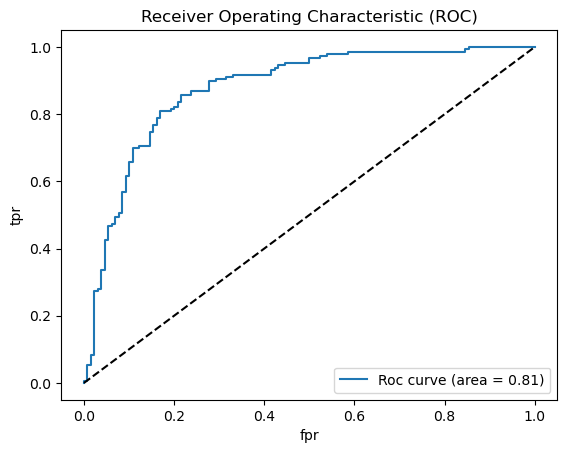

In [114]:
plt.plot(fpr,tpr, label='Roc curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

In [98]:
# manually